# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

### Откройте файлы и изучите их.

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. 

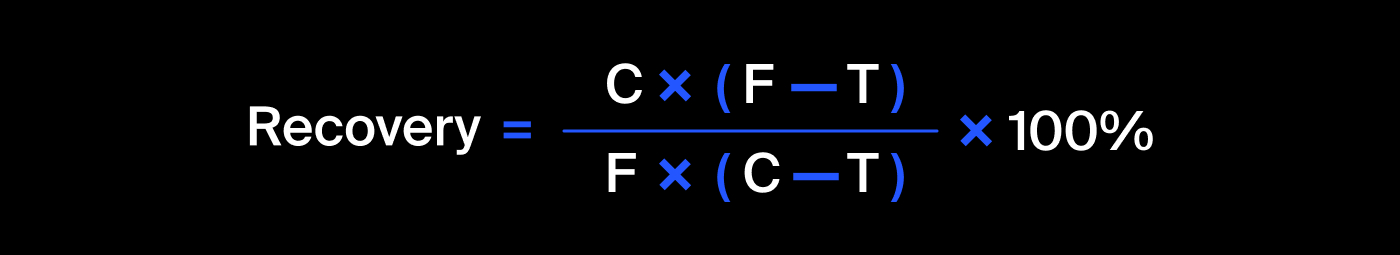

<br>C — доля золота в концентрате после флотации/очистки;
<br>F — доля золота в сырье/концентрате до флотации/очистки;
<br>T — доля золота в отвальных хвостах после флотации/очистки.

In [9]:
#выписала основные константы
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [10]:
#посчитала по формуле
recovery = pd.Series
recovery = ((C*(F-T))/(F*(C-T)))*100

In [11]:
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [12]:
#проверила среднее рассчетное значение
recovery.mean()

82.70450164550293

In [13]:
#среднее признака
train['rougher.output.recovery'].mean()

82.70450164550293

In [14]:
#MAE между расчётами и значением признака
mean_absolute_error(recovery, train['rougher.output.recovery'])

9.73512347450521e-15

Получается, что среднее расчетное значение и среднее признака одинаковое. Средняя абсолютная ошибка маленькая, поэтому будем считать, что эффективность обогащения рассчитана верно.

### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
train_columns = train.columns

In [16]:
test_columns = test.columns

In [17]:
#получили разницу в 34 признака
len(train_columns) - len(test_columns)

34

In [18]:
#найдем какие признаки и проверим, все ли я правильно вычла
diff = set(train_columns) - set(test_columns)
print("Разница:", len(diff))

Разница: 34


In [19]:
diff

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### Проведите предобработку данных.

In [21]:
print("Нулевые значения:",test.isna().sum())
print("\n")
print("Дубликаты:", test.duplicated().sum())

Нулевые значения: date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
ro

In [22]:
print("Нулевые значения:",train.isna().sum())
print("\n")
print("Дубликаты:", train.duplicated().sum())

Нулевые значения: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


Дубликаты: 0


In [23]:
print("Нулевые значения:",data.isna().sum())
print("\n")
print("Дубликаты:", data.duplicated().sum())

Нулевые значения: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


Дубликаты: 0


In [24]:
#нулевых значений не так уж и много, я решила заменить их нулями
#test = test.fillna(0)
#train = train.fillna(0)
#data = data.fillna(0)

In [25]:
test.ffill(axis='rows', inplace=True)
train.ffill(axis='rows', inplace=True)
data.ffill(axis='rows', inplace=True)

In [26]:
print("Нулевые значения:",data.isna().sum())
print("\n")
print("Дубликаты:", data.duplicated().sum())

Нулевые значения: date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


Дубликаты: 0


In [27]:
print("Нулевые значения:",train.isna().sum())
print("\n")
print("Дубликаты:", train.duplicated().sum())

Нулевые значения: date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


Дубликаты: 0


In [28]:
print("Нулевые значения:",test.isna().sum())
print("\n")
print("Дубликаты:", test.duplicated().sum())

Нулевые значения: date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatban

Были изученны три датасета: обучающий, тестовый и с полными данными. Была проверена эффективность обогащения, данный признак расчитан верно. Всего в тестовой выборке отуствуют 34 признака, в отличии от обучающей. Это выходные и расчетные характеристики. Значит, их нельзя использовать при обучении, так как они еще не будут доступны к моменту начала процесса. Есть незначительные пропуски в данных.

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [29]:
#не совсем поняла какую выборку использовать в данном задании, поэтому я буду обращаться к обучающей.

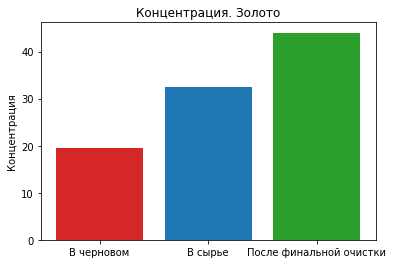

In [30]:
fig, ax = plt.subplots()

au = ['В черновом', 
                   'В сырье', 
                   'После финальной очистки']
counts = train[['rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']].mean()

bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(au, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Концентрация')
ax.set_title('Концентрация. Золото')

plt.show()

In [31]:
#Концентрация золота повышается после финальной очистки

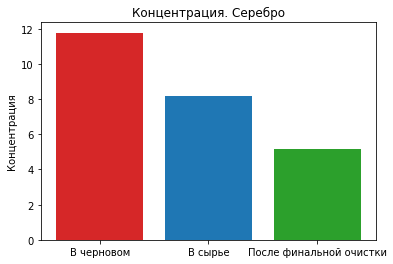

In [32]:
fig, ax = plt.subplots()

ag = ['В черновом', 
                   'В сырье', 
                   'После финальной очистки']

counts = train[['rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']].mean()

bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(au, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Концентрация')
ax.set_title('Концентрация. Серебро')

plt.show()

In [33]:
#В черновом больше всего концентрации серебра, после финальной очистки самая минимальная концентрация

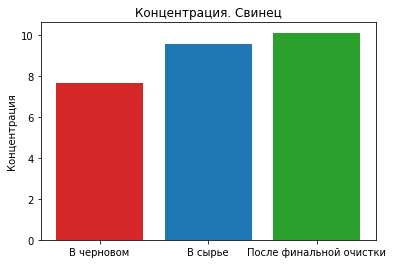

In [34]:
fig, ax = plt.subplots()

pb = ['В черновом', 
                   'В сырье', 
                   'После финальной очистки']

counts = train[['rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']].mean()

bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(au, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Концентрация')
ax.set_title('Концентрация. Свинец')

plt.show()

In [35]:
#В свинце концентрация понемногу растет с каждым этапом

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64


<AxesSubplot:>

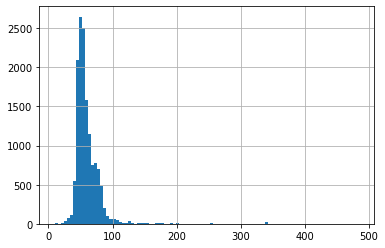

In [36]:
print(train['rougher.input.feed_size'].describe())
train['rougher.input.feed_size'].hist(bins=100)

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


<AxesSubplot:>

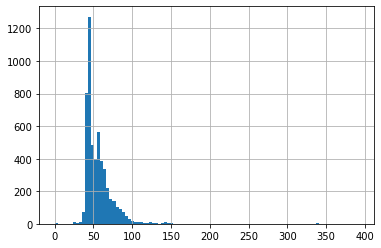

In [37]:
print(test['rougher.input.feed_size'].describe())
test['rougher.input.feed_size'].hist(bins=100)

In [38]:
#по распределению на графиках и по среднему значению разница не велика. Будем считать, что примерно равны.

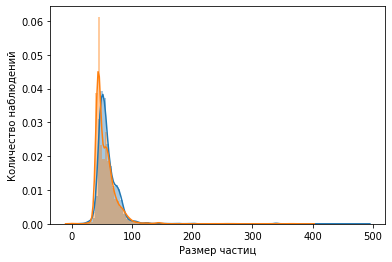

In [39]:
sns.distplot(train['rougher.input.feed_size'], bins=100)
sns.distplot(test['rougher.input.feed_size'], bins=100)

plt.xlabel('Размер частиц')
plt.ylabel('Количество наблюдений')
plt.show()

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [40]:
#в сырье
primary_cleaner = train[['primary_cleaner.output.concentrate_au',
            'primary_cleaner.output.concentrate_ag',
              'primary_cleaner.output.concentrate_pb',
              'primary_cleaner.output.concentrate_sol']].sum(axis=1)

<AxesSubplot:ylabel='Count'>

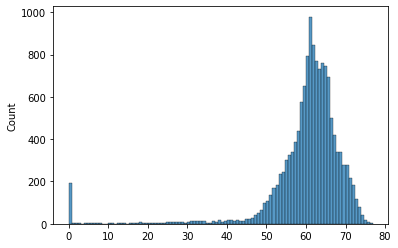

In [41]:
sns.histplot(primary_cleaner, fill=True, bins=100)

In [42]:
#в черновом концентрате
rougher_output = train[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)

<AxesSubplot:ylabel='Count'>

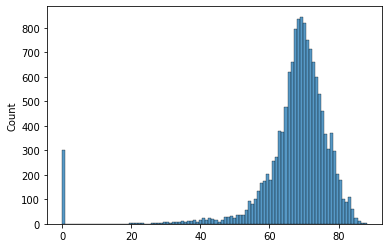

In [43]:
sns.histplot(rougher_output, fill=True, bins=100)

In [44]:
#в финальном концентрате
final = train[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

<AxesSubplot:ylabel='Count'>

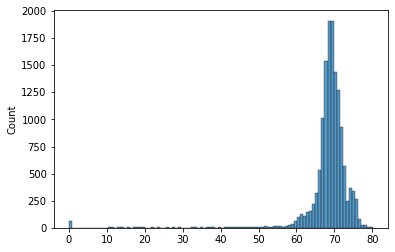

In [45]:
sns.histplot(final, fill=True, bins=100)

## Модель

### Напишите функцию для вычисления итоговой sMAPE

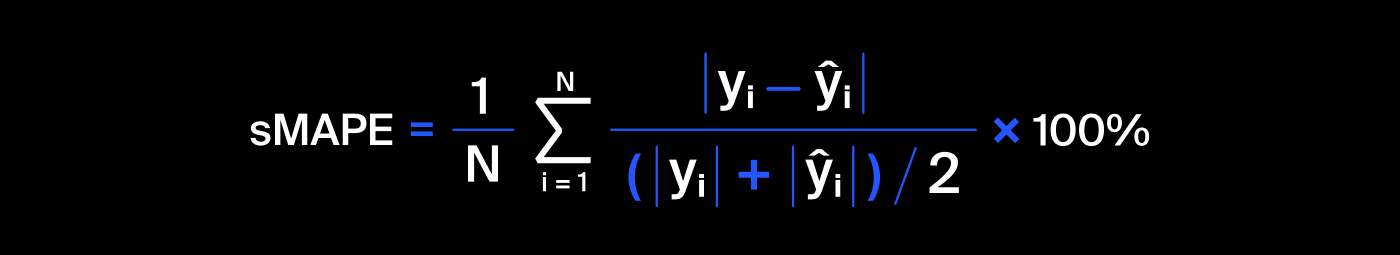

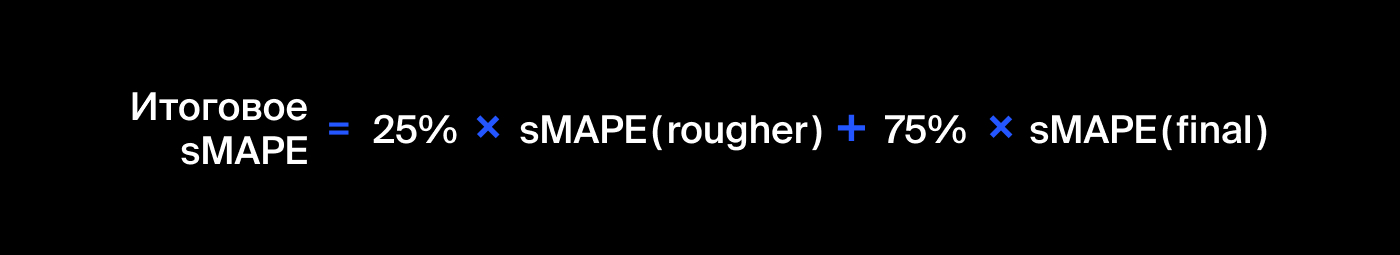

In [46]:
def sMAPE(y_train_rougher, y_train_rougher_predicted, y_train_final, y_train_final_predicted):
    sMAPE_rougher = np.mean(abs(y_train_rougher - y_train_rougher_predicted)/
                            ((abs(y_train_rougher)+abs(y_train_rougher_predicted))/2))*100
    sMAPE_final = np.mean(abs(y_train_final - y_train_final_predicted)/
                            ((abs(y_train_final)+abs(y_train_final_predicted))/2))*100
    final_sMAPE = sMAPE_rougher * 0.25 + sMAPE_final * 0.75
    return final_sMAPE

### Обучите разные модели и оцените их качество. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы

In [47]:
# Сперва нужно привести все признаки к одному виду
train = train.drop(set(train.columns)-set(test.columns), axis=1)

In [48]:
# Добавим целевые признаки
df = data[['date', 'rougher.output.recovery', 'final.output.recovery']]
test = test.merge(df, how = 'left', on = 'date')
train = train.merge(df, how = 'left', on = 'date')

In [49]:
# Разницы в признаках нет, можно разбивать на таргет и фичи
len(train.columns) - len(test.columns)

0

In [50]:
# Делим признаки на фичи и таргет:
X_train_rougher = train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_train_rougher = train['rougher.output.recovery']
X_train_final = X_train_rougher
y_train_final = train['final.output.recovery']

In [51]:
# Масштабируем признаки:
scaler = StandardScaler()
scaler.fit(X_train_rougher)
scaler.fit(X_train_final)
 
X_train_rougher = scaler.transform(X_train_rougher)
X_train_final = scaler.transform(X_train_final)

#### RF

In [52]:
# Зададим параметры модели:
clf = RandomForestRegressor()
param_grid = {'n_estimators': range(10, 41, 10),
              'max_depth': range(1,8, 2)
             }
new_score = make_scorer(sMAPE, greater_is_better=False)
 
grid_rougher = GridSearchCV(clf, param_grid, scoring=new_score, cv=5)
grid_final = GridSearchCV(clf, param_grid, scoring=new_score, cv=5)

In [53]:
# Обучаем модели
grid_rougher.fit(X_train_rougher, y_train_rougher)
grid_final.fit(X_train_final, y_train_final)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 8, 2),
                         'n_estimators': range(10, 41, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [54]:
y_train_rougher_predicted = grid_rougher.predict(X_train_rougher)
y_train_final_predicted = grid_final.predict(X_train_final)

In [55]:
data_rf = {'real_rougher' : y_train_rougher, 'predicted_rougher' : y_train_rougher_predicted,
       'real_final' : y_train_final, 'predicted_final' : y_train_final_predicted}

In [56]:
data_rf_res = pd.DataFrame(data_rf, columns = ['real_rougher', 'predicted_rougher', 'real_final', 'predicted_final'])
display(data_rf_res.head())
print('sMAPE:', sMAPE(y_train_rougher, y_train_rougher_predicted, y_train_final, y_train_final_predicted))

,real_rougher,predicted_rougher,real_final,predicted_final
0,87.107763,82.177834,70.541216,66.79303
1,86.843261,82.177834,69.266198,66.79303
2,86.842308,82.177834,68.116445,66.79303
3,87.226430,82.177834,68.347543,66.79303
4,86.688794,82.177834,66.927016,66.79303


sMAPE: 10.408694299251364


#### LR

In [57]:
lr_final = LinearRegression()
lr_rougher = LinearRegression()

In [58]:
# Обучаем модели
lr_rougher.fit(X_train_rougher, y_train_rougher)
lr_final.fit(X_train_final, y_train_final)

LinearRegression()

In [59]:
y_train_rougher_predicted_lr = lr_rougher.predict(X_train_rougher)
y_train_final_predicted_lr = lr_final.predict(X_train_final)

In [60]:
data_lr = {'real_rougher' : y_train_rougher, 'predicted_rougher' : y_train_rougher_predicted_lr,
       'real_final' : y_train_final, 'predicted_final' : y_train_final_predicted_lr}

In [61]:
data_lr_res = pd.DataFrame(data_lr, columns = ['real_rougher', 'predicted_rougher', 'real_final', 'predicted_final'])
display(data_lr_res.head())
print('sMAPE:', sMAPE(y_train_rougher, y_train_rougher_predicted_lr, y_train_final, y_train_final_predicted_lr))

,real_rougher,predicted_rougher,real_final,predicted_final
0,87.107763,83.230705,70.541216,63.647444
1,86.843261,81.555057,69.266198,63.799462
2,86.842308,80.692452,68.116445,63.963691
3,87.226430,80.653358,68.347543,63.883331
4,86.688794,80.447318,66.927016,62.863068


sMAPE: 9.272740074394875


#### Catboost

In [73]:
cat  = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

new_score = make_scorer(sMAPE, greater_is_better=False)

cat_rougher = GridSearchCV(cat, param_grid, scoring=new_score, cv=5)
cat_final = GridSearchCV(cat, param_grid, scoring=new_score, cv=5)

In [74]:
# Обучаем модели
cat_rougher.fit(X_train_rougher, y_train_rougher)
cat_final.fit(X_train_final, y_train_final)

Learning rate set to 0.062229
0:	learn: 14.2190100	total: 24.4ms	remaining: 24.4s
1:	learn: 14.0078681	total: 42.3ms	remaining: 21.1s
2:	learn: 13.8033049	total: 60.6ms	remaining: 20.2s
3:	learn: 13.5903813	total: 79.7ms	remaining: 19.8s
4:	learn: 13.4056456	total: 98.3ms	remaining: 19.6s
5:	learn: 13.2302263	total: 116ms	remaining: 19.2s
6:	learn: 13.0771384	total: 134ms	remaining: 19s
7:	learn: 12.9237117	total: 152ms	remaining: 18.8s
8:	learn: 12.7858792	total: 169ms	remaining: 18.7s
9:	learn: 12.6578284	total: 188ms	remaining: 18.6s
10:	learn: 12.5108016	total: 206ms	remaining: 18.5s
11:	learn: 12.4070498	total: 223ms	remaining: 18.4s
12:	learn: 12.3147943	total: 241ms	remaining: 18.3s
13:	learn: 12.2298913	total: 259ms	remaining: 18.2s
14:	learn: 12.1405965	total: 278ms	remaining: 18.2s
15:	learn: 12.0324434	total: 306ms	remaining: 18.8s
16:	learn: 11.9436277	total: 324ms	remaining: 18.7s
17:	learn: 11.8616922	total: 341ms	remaining: 18.6s
18:	learn: 11.7398002	total: 358ms	remain

In [80]:
cat_rougher.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.06222900003194809,
 'score_function': 'Cosine',
 'task_type'

In [81]:
cat_final.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.06222900003194809,
 'score_function': 'Cosine',
 'task_type'

In [82]:
y_train_rougher_predicted_cat = cat_rougher.predict(X_train_rougher)
y_train_final_predicted_cat = cat_final.predict(X_train_final)

In [83]:
data_cat = {'real_rougher' : y_train_rougher, 'predicted_rougher' : y_train_rougher_predicted_cat,
       'real_final' : y_train_final, 'predicted_final' : y_train_final_predicted_cat}

In [84]:
data_cat_res = pd.DataFrame(data_cat, columns = ['real_rougher', 'predicted_rougher', 'real_final', 'predicted_final'])
display(data_cat_res.head())
print('sMAPE:', sMAPE(y_train_rougher, y_train_rougher_predicted_cat, y_train_final, y_train_final_predicted_cat))

,real_rougher,predicted_rougher,real_final,predicted_final
0,87.107763,83.068102,70.541216,67.016385
1,86.843261,83.020974,69.266198,66.298717
2,86.842308,84.934603,68.116445,67.059377
3,87.226430,82.739917,68.347543,66.788417
4,86.688794,82.359873,66.927016,66.204025


sMAPE: 5.553256381228492


### Проверка на тесте

In [67]:
X_test_rougher = test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_test_rougher = test['rougher.output.recovery']
X_test_final = X_test_rougher
y_test_final = test['final.output.recovery']

In [68]:
y_rougher_predicted = cat_rougher.predict(X_test_rougher)
y_final_predicted = cat_final.predict(X_test_final)

print('Итоговое sMAPE на тестовой выборке:',sMAPE(
    y_test_rougher, y_rougher_predicted, y_test_final, y_final_predicted).mean())

Итоговое sMAPE на тестовой выборке: 23.233139919418083


In [69]:
base_rougher = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")

In [70]:
base_rougher.fit(X_train_rougher, y_train_rougher)
base_final.fit(X_train_final, y_train_final)

DummyRegressor(strategy='median')

In [71]:
base_rougher_pred = base_rougher.predict(X_test_rougher)
base_final_pred = base_final.predict(X_test_final)

In [72]:
print('Итоговое sMAPE на тестовой выборке:',sMAPE(
    y_test_rougher, base_rougher_pred, y_test_final, base_final_pred).mean())

Итоговое sMAPE на тестовой выборке: 9.47991919812286


## Вывод

<b>Подготовка данных</b>
<br>    Были изученны три датасета: обучающий, тестовый и с полными данными. Была проверена эффективность обогащения. Всего в тестовой выборке отуствуют 34 признака, в отличии от обучающей. В основном это все какие-то рассчетные признаки. Есть незначительные пропуски в данных.

<b>Анализ данных</b>
<br>        Сравнили распределение гранул сырья на обучающей и тестовой выборке. Они оказались примерно равномерными.
    Исследовали суммарную концентрацию всех веществ на разных стадиях:
    Самая высокая концентрация В сырье у золота.
    В черновом - Feed_Sol
    После финальной очистки - золото.
    
<b>Модель</b>
<br>    Написали функцию для вычисения итоговой sMAPE. Обучили модели (рандомный лес, кэтбуст, линейная регрессия). По итогам был выбран кэтбуст. Итоговая sMAPE - 5.55.
        Проверили модель на тестовых данных, sMAPE - 23.23    